**Histogram Equalization Exercise**

In today's excercise we'll implement some contrast enhancement techniques from the async lectures.

1) **Contrast Stretching:** Scale the image intensities linearly so that the minimum and maximum are 0 and 255 respectively. (Hint: you can use the `exposure.rescale_intensity` function to do this scaling.)

2) **Gamma Correction:** Recall from the async lectures that the formula for gamma correction is `I_gamma(x,y) = I(x,y)^g`. Apply this correction to the image. Note that when `g > 1` the image gets darker, and when `g < 1` the image gets brighter. (Hint: don't forget to make sure the image intensities are in the range 0-1 and not 0-255.)

3) **Histogram Equalization:** Again, we saw this in the async lecture. The goal is to make the histogram of the image uniform(ish). This is done by inverting the cumulative distribution (cdf) of the image. We have computed the cdf for you. The inversion of the cdf is computed as `I_eq(x,y) = cdf[I(x,y)]`. Compute the image that results from this equalization function. (Hint: not every pixel value has a corresponding cdf value, so you will need to fill in the blanks to use the pixel value as an index.)


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import urllib
from PIL import Image

from skimage import exposure, data, img_as_float
from skimage.color import rgb2gray

matplotlib.rcParams['font.size'] = 16


def plot_img_and_hist(image, axes, title, bins=256):
    """
    Plot an image along with its histogram and cumulative histogram
    """

    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=1)
    ax_img.set_axis_off()
    ax_img.set_title(title)

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_cdf


def display_images(orig, stretched, gamma, hist_eq):
  """
  Plot the original image and all three modified images
  along with their histograms
  """

  fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

  # plot original
  plot_img_and_hist(orig, axes[:, 0], title='Original Image')

  # set left y-axis label
  y_min, y_max = axes[1, 0].get_ylim()
  axes[1, 0].set_ylabel('Number of pixels')
  axes[1, 0].set_yticks(np.linspace(0, y_max, 5))

  # plot modifications
  plot_img_and_hist(stretched, axes[:, 1], title='Contrast Stretching')
  plot_img_and_hist(gamma, axes[:, 2], title='Gamma Correction')
  ax_cdf = plot_img_and_hist(hist_eq, axes[:, 3], title='Histogram Equalization')

  # set right y-axis label
  ax_cdf.set_ylabel('Fraction of total intensity')
  ax_cdf.set_yticks(np.linspace(0, 1, 5))

  # prevent overlap of y-axis labels
  fig.tight_layout()
  plt.show()

def read_img(url):
  return np.array(Image.open(urllib.request.urlopen(url)))[:, :, :3]

In [ ]:
# contrast stretching
def contrast_stretching(in_img):
  # get min and max
  min_v = np.min(in_img)
  max_v = np.max(in_img)

  # rescale intensity to min/max range
  out_img = exposure.rescale_intensity(in_img, in_range=(min_v, max_v))
  return out_img

# gamma correction
def gamma_correction(in_img, gamma):
  # convert img to float64
  f_img = in_img.astype(np.float64)/255.0

  # apply gamma
  g_img = f_img ** gamma

  # convert img back to uint8
  out_img = (g_img * 255).astype(np.uint8)
  return out_img

# histogram equalization
def histogram_equalization(in_img):
  # compute cdf
  img_cdf, bins = exposure.cumulative_distribution(in_img, 256)

  # create empty array for all possible pixel values
  new_cdf = np.zeros(256)

  # populate array with values from cdf
  # use bins as the index into the array
  new_cdf[bins] = img_cdf

  # create empty array the same size as the image
  out_img = np.zeros(in_img.shape, dtype=in_img.dtype)

  # for each pixel, look up the value from the cdf
  for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
      out_img[i, j] = (new_cdf[ in_img[i, j] ] * 255)

  return out_img

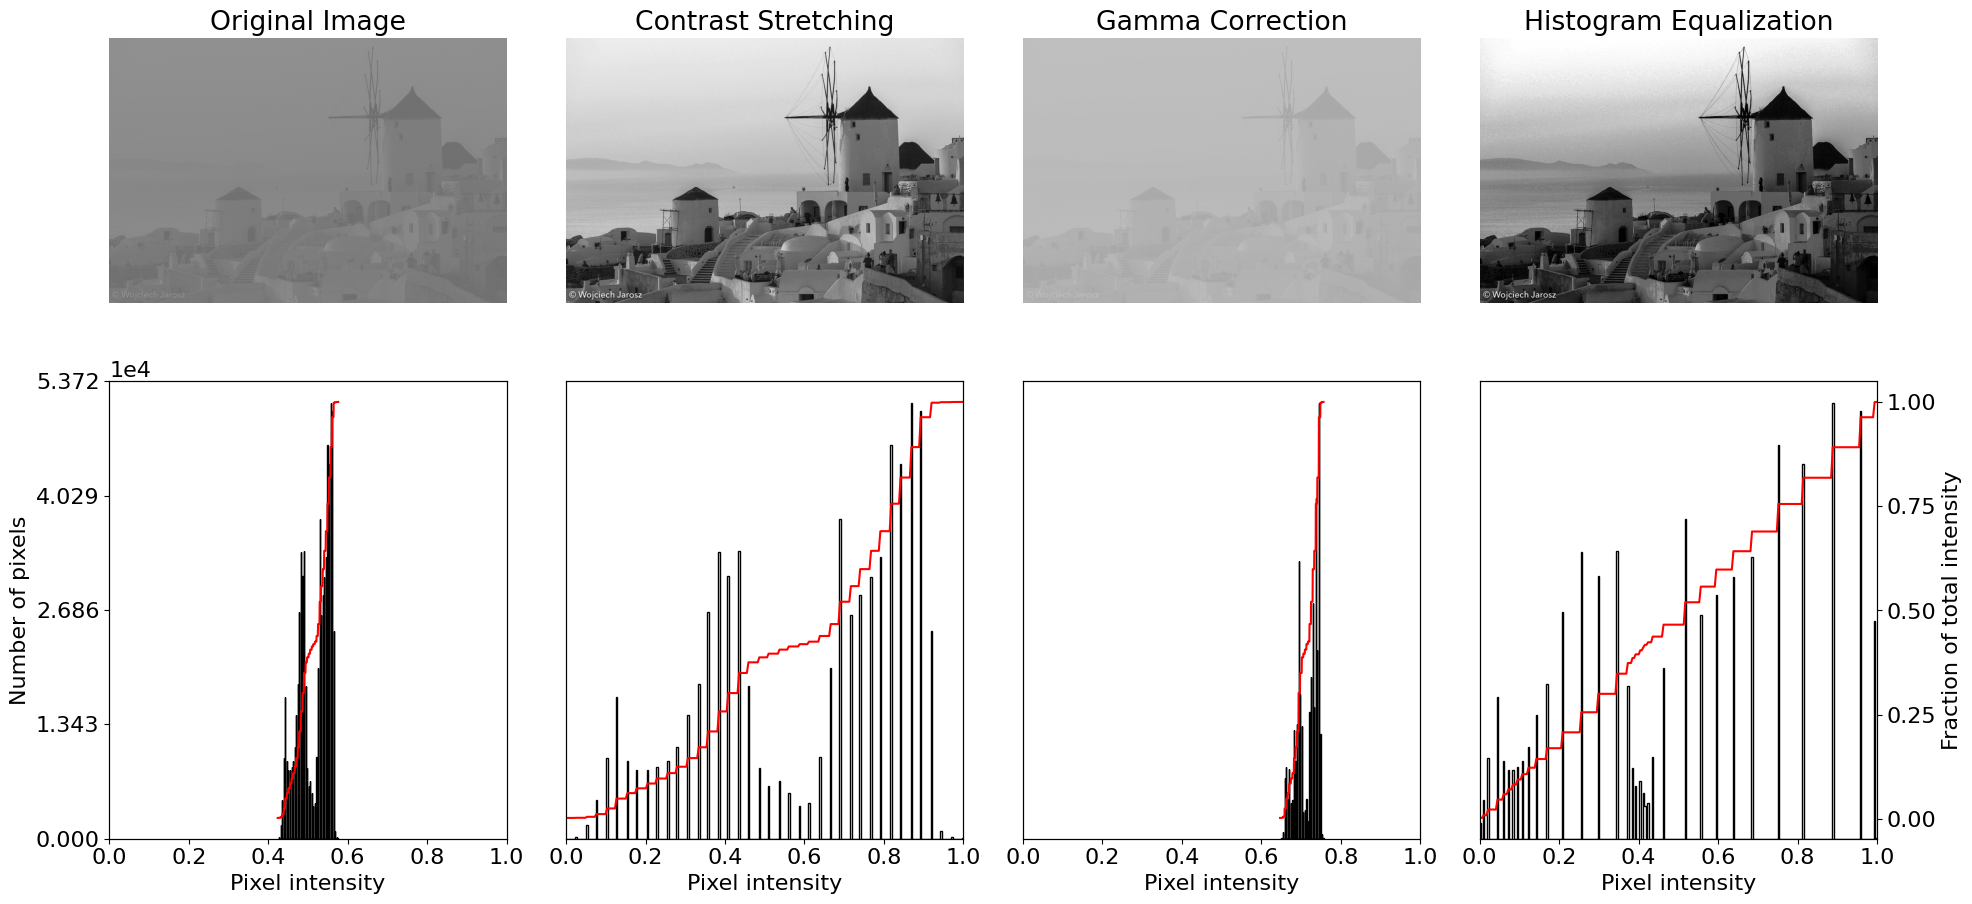

In [ ]:
# load an example image
img = read_img('https://raw.githubusercontent.com/W281/fileRepository/main/windmill-low_contrast.png')
#img = read_img('https://raw.githubusercontent.com/W281/fileRepository/main/he_failure.png')

# pre-process image
img = (rgb2gray(img) * 255).astype(np.uint8)

display_images(img, contrast_stretching(img), gamma_correction(img, gamma=0.5), histogram_equalization(img))